# Data Analyse: Analyse de Series Temporelles

## Importation des Packages

In [1]:
# !pip install pandas-datareader  --user -U

In [2]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

In [3]:
df_microsoft = pdr.get_data_yahoo('MSFT')

In [4]:
df_microsoft.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-02-18,293.859985,286.309998,293.049988,287.929993,34223200.0,287.929993
2022-02-22,291.540009,284.500000,285.000000,287.720001,41736100.0,287.720001
2022-02-23,291.700012,280.100006,290.179993,280.269989,37811200.0,280.269989
2022-02-24,295.160004,271.519989,272.510010,294.589996,56989700.0,294.589996
2022-02-25,297.609985,291.654999,295.140015,297.309998,32546721.0,297.309998


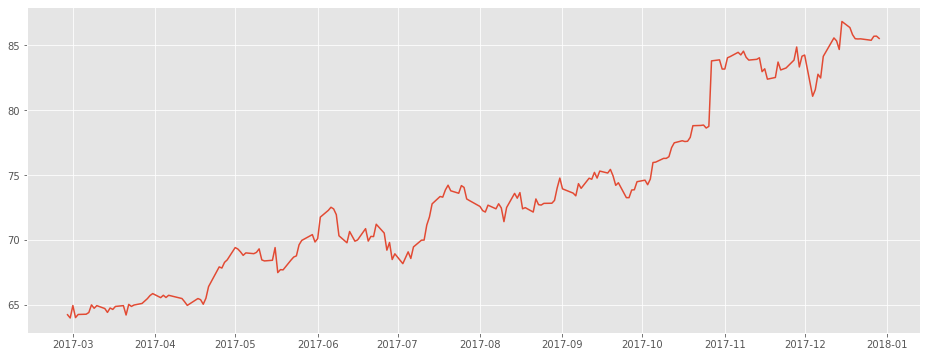

In [303]:
plt.figure(figsize=(16,6))
plt.plot(df_microsoft.loc['2017','Close'])

In [6]:
df_microsoft.index[0]

Timestamp('2017-02-27 00:00:00')

In [15]:
les_max = df_microsoft.High.resample('W').agg(['max', 'mean'])
les_min = df_microsoft.High.resample('W').agg(['min'])

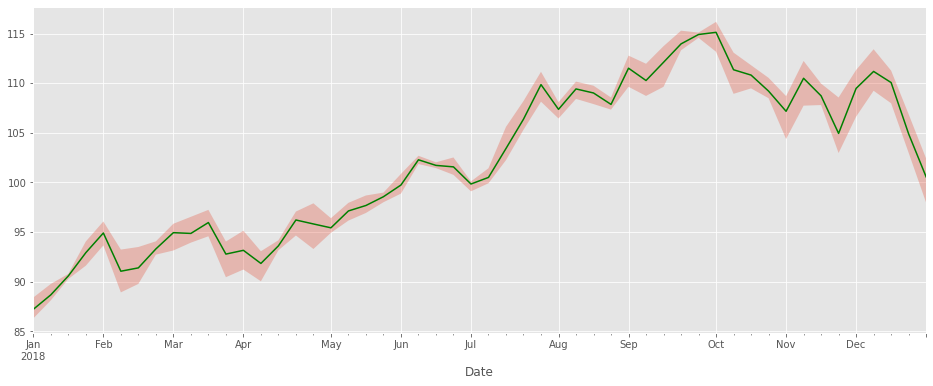

In [24]:
plt.figure(figsize=(16,6))
les_max['2018']['mean'].plot(c='green')
plt.fill_between(
    les_max['2018'].index,
    les_max['2018']['max'],
    les_min['2018']['min'],
    alpha=0.3
)

In [98]:
price_max_from_2017_to_2022 = df_microsoft.High.agg(['max'])
price_min_from_2017_to_2022 = df_microsoft.Low.agg(['min'])

In [99]:
price_max_from_2017_to_2022

max    349.670013
Name: High, dtype: float64

In [100]:
price_max_from_2017_to_2022.index

Index(['max'], dtype='object')

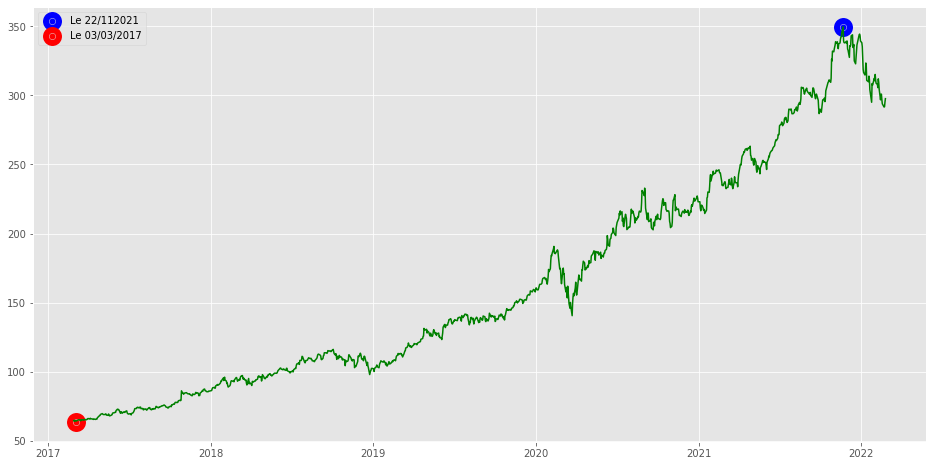

In [292]:
index_max = df_microsoft[df_microsoft['High'] == price_max_from_2017_to_2022['max']].index
index_min = df_microsoft[df_microsoft['Low'] == price_min_from_2017_to_2022['min']].index
plt.figure(figsize=(16, 8))
plt.plot(df_microsoft.index, df_microsoft.High, c='g')
plt.scatter(np.array([index_max]), price_max_from_2017_to_2022['max'], lw=13, c="b", label=f'Le {index_max[0].strftime("%d/%m%Y")}')
plt.scatter(np.array([index_min]), price_min_from_2017_to_2022['min'], lw=13, c="r" , label=f'Le {index_min[0].strftime("%d/%m/%Y")}')
plt.legend()

In [104]:
index_max

DatetimeIndex(['2021-11-22'], dtype='datetime64[ns]', name='Date', freq=None)

In [105]:
index_min

DatetimeIndex(['2017-03-03'], dtype='datetime64[ns]', name='Date', freq=None)

In [274]:
data = df_microsoft.resample('Q').agg(['max', 'mean', 'min']);

In [296]:
def periode_fr(periode):
    p = ''
    if periode == 'Q':
        p = 'Trimestre'
    elif periode == 'M':
        p = 'Mois'
    elif periode == 'D':
        p = 'Jour'
    elif periode == 'W':
        p = 'Semaine'
        
    return p

In [297]:
def graphiphique_perso(df_microsoft, periode, annee, col, fun_agg, c='g'):
    data = df_microsoft.resample(periode).agg(['max', 'mean', 'min']);
    plt.figure(figsize=(16, 5))
    plt.plot(data[annee][col][fun_agg], label=f'{fun_agg}', c=c)
    plt.fill_between(
        data[annee][col].index, 
        data[annee][col]['min'], 
        data[annee][col]['max'],
        alpha=0.3)
    plt.title(f'L\'analyse de la colonne {col} par {periode_fr(periode)}')
    plt.legend();

In [300]:
donnees = [
    {'col': 'High', 'annee': '2019', 'fun_agg': 'mean', 'periode': 'W'},
    {'col': 'Close', 'annee': '2020', 'fun_agg': 'mean', 'periode': 'W'},
    {'col': 'Low', 'annee': '2021', 'fun_agg': 'mean', 'periode': 'W'},
    {'col': 'Open', 'annee': '2018', 'fun_agg': 'mean', 'periode': 'W'},
    {'col': 'Volume', 'annee': '2018', 'fun_agg': 'mean', 'periode': 'W'}
]

[None, None, None, None, None]

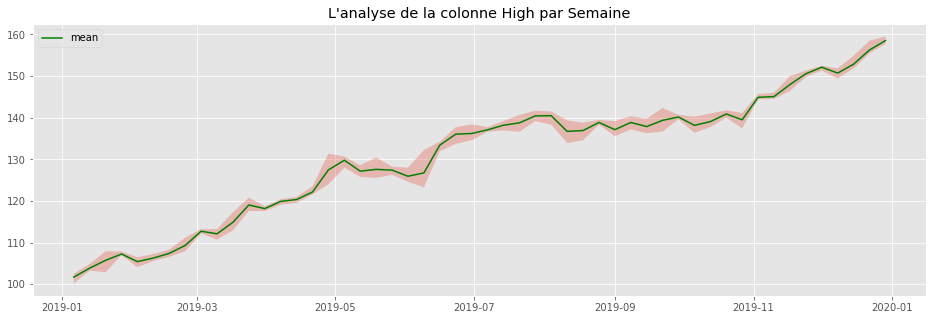

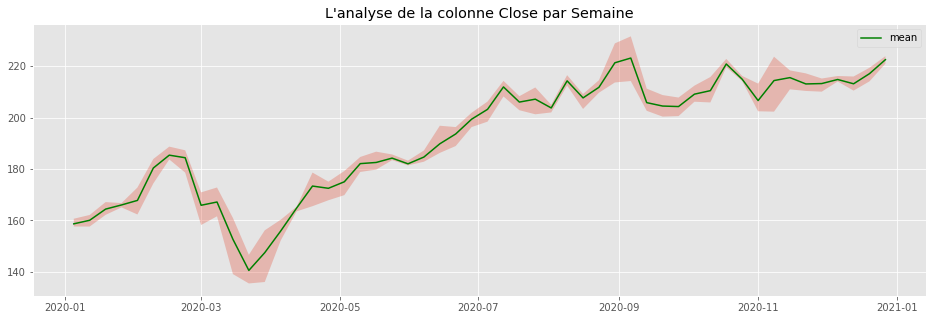

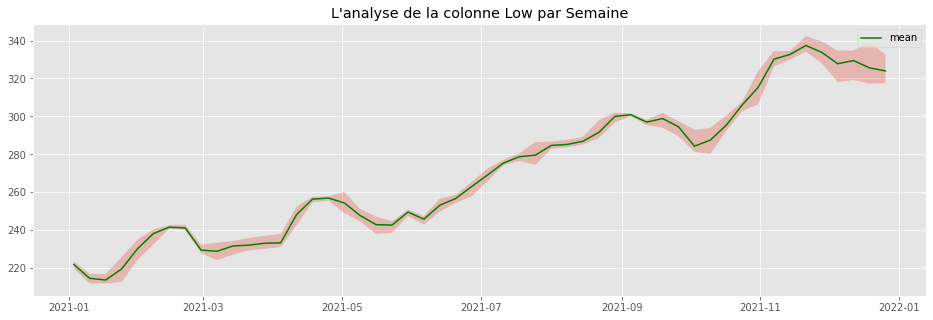

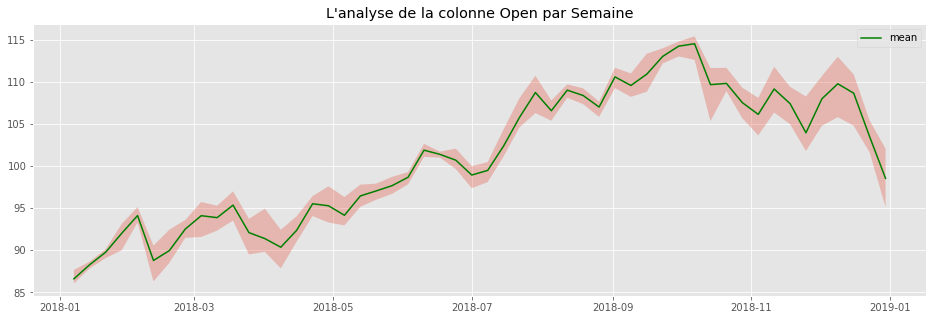

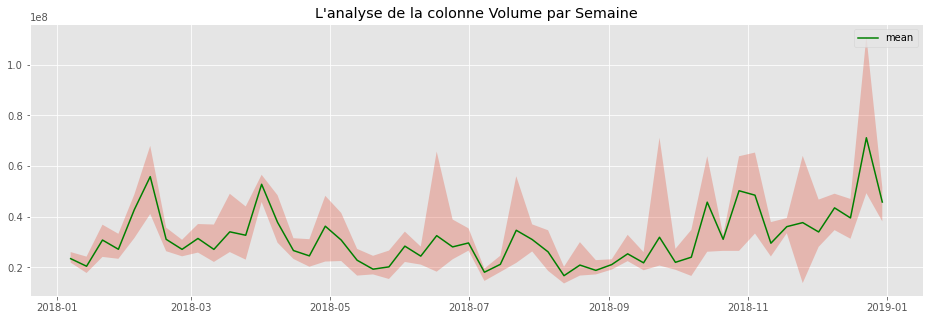

In [301]:
[graphiphique_perso(df_microsoft, action['periode'], action['annee'], action['col'], action['fun_agg']) for action in donnees]